In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
data = np.loadtxt("data/events_smear.txt")

# Delete Energy (E) entries
# data = np.delete(data, [0, 4], axis=1)

# Delete theta and phi
# data = np.delete(data, [8, 9], axis=1)
input_dimension = data.shape[1]

In [166]:
data.shape

(100000, 10)

In [167]:
thetas = data[:, 8]
phis = data[:, 9]

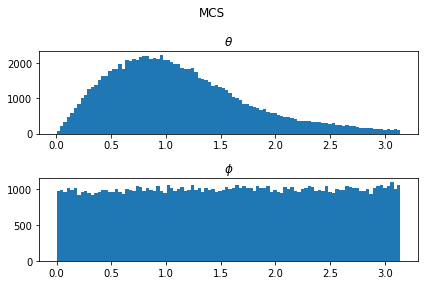

In [168]:
def angle_plot(thetas, phis, title="MCS"):
    fig, ax = plt.subplots(2,1)
    ax[0].hist((thetas), bins=100)
    ax[0].set_title(r"$\theta$")
    ax[1].hist(phis, bins=100)
    ax[1].set_title(r"$\phi$")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

angle_plot(thetas, phis)

In [119]:
def momentum_particle_sums(data):
    p_x_sum = data[:, 1] + data[:, 5]
    p_y_sum = data[:, 2] + data[:, 6]
    p_z_sum = data[:, 3] + data[:, 7]
    return p_x_sum, p_y_sum, p_z_sum

In [120]:
NF_generated = np.loadtxt("./generated/NF.txt",)
vae_generated = np.loadtxt("./generated/vae.txt",)
gan_generated = np.loadtxt("./generated/gan.txt",)

In [121]:
def plot_momenta(data, axs, name):
    p_x_sum, p_y_sum, p_z_sum = momentum_particle_sums(data)
    axs[0].set_title(f"{name}, $p_x$")
    axs[0].hist(p_x_sum, bins=100)
    axs[1].set_title(f"{name}, $p_y$")
    axs[1].hist(p_y_sum, bins=100)
    axs[2].set_title(f"{name}, $p_z$")
    axs[2].hist(p_z_sum, bins=100)

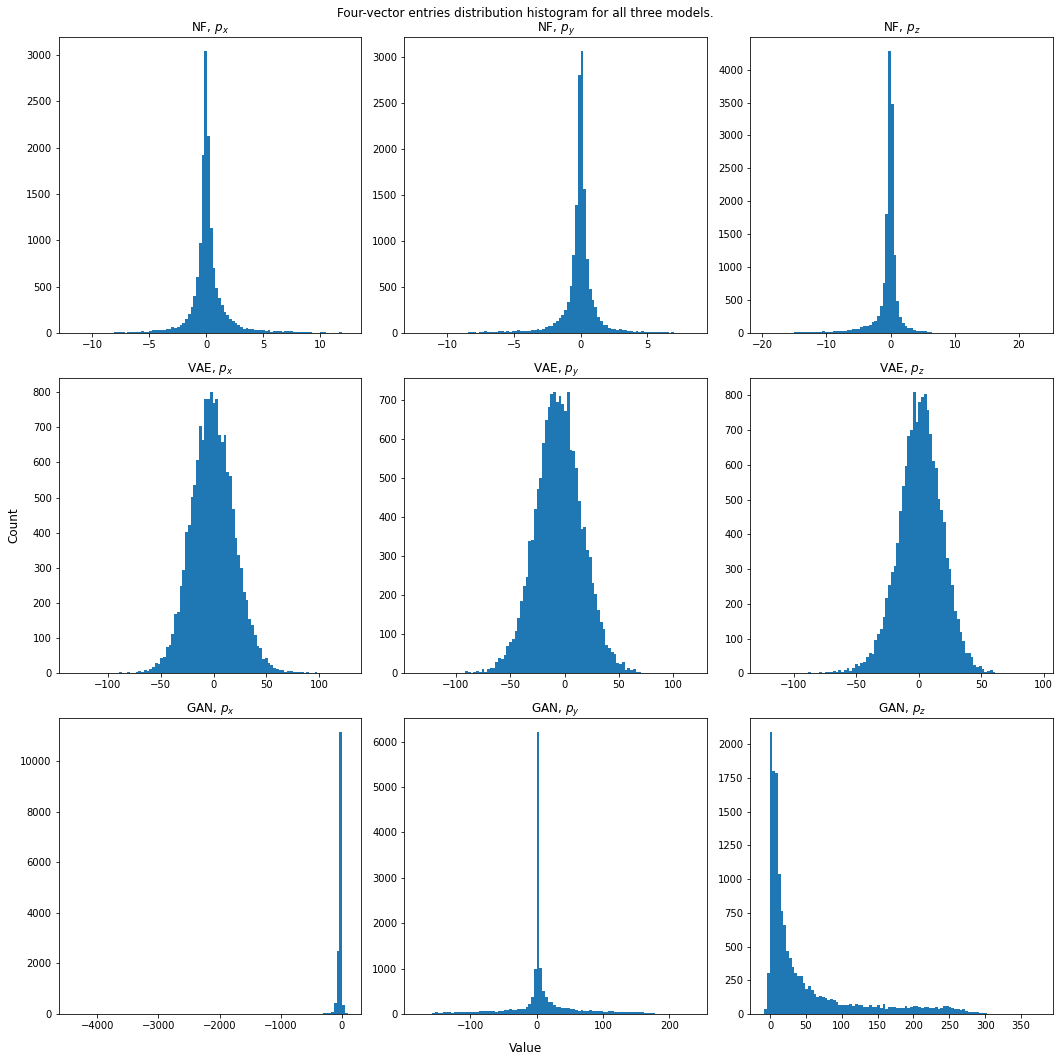

In [122]:
fig, axs3d = plt.subplots(3,3, figsize=(15, 15))
plot_momenta(NF_generated, axs3d[0], "NF")
plot_momenta(vae_generated, axs3d[1], "VAE")
plot_momenta(gan_generated, axs3d[2], "GAN")
plt.suptitle("Four-vector entries distribution histogram for all three models.")
fig.supxlabel("Value")
fig.supylabel("Count")
plt.tight_layout()
plt.show()

In [123]:
data[0]

array([101.00566688,   3.25542909,  71.94239646, -69.38078821,
       101.00821433,  -3.25542909, -71.94239646,  69.38078821,
         2.33755955,   1.52557668])

In [124]:
p1 = data[0, 0:4]
p2 = data[0, 4:8]

In [125]:
(p1[0])**2 - p1[1]**2 - p1[2]**2 - p1[3]**2

202.14474154823256

In [126]:
2*p2[0]**2, 2*p2[1]**2, 2*p2[2]**2, 2*p2[3]**2

(20405.31872552335, 21.195637070017693, 10351.416817706286, 9627.387545223693)

In [127]:
(1110**2) - ((-60)**2) - (55**2) - ((-33)**2)

1224386

In [128]:
def dispersion(p):
    return (p[0])**2 - p[1]**2 - p[2]**2 - p[3]**2

In [129]:
dispersion(p1)

202.14474154823256

In [130]:
np.sqrt(dispersion(p2))

14.235847806213604

In [131]:
np.sqrt(dispersion(p1))

14.217761481619831

In [132]:
np.sqrt(dispersion(p1 + p2))

202.01388121149074

In [133]:
p1 + p2

array([202.01388121,   0.        ,   0.        ,   0.        ])

In [134]:
np.sqrt(dispersion(p1))

14.217761481619831

In [135]:
def get_phi(p):
    E, px, py, pz = p
    return np.arctan(py / px)

def get_theta(p):
    E, px, py, pz = p
    return np.arccos(pz / np.sqrt(px**2 + py**2 + pz**2))

In [136]:
print(get_theta(p1), get_phi(p1))

2.3375595536304057 1.5255766785056692


In [137]:
p1

array([101.00566688,   3.25542909,  71.94239646, -69.38078821])

In [138]:
data[0]

array([101.00566688,   3.25542909,  71.94239646, -69.38078821,
       101.00821433,  -3.25542909, -71.94239646,  69.38078821,
         2.33755955,   1.52557668])

In [153]:
NF_phis = np.array(list(map(get_phi, NF_generated[:, 0:4])))
VAE_phis = np.array(list(map(get_phi, vae_generated[:, 0:4])))
GAN_phis = np.array(list(map(get_phi, gan_generated[:, 0:4])))
NF_thetas = np.array(list(map(get_theta, NF_generated[:, 0:4])))
VAE_thetas = np.array(list(map(get_theta, vae_generated[:, 0:4])))
GAN_thetas = np.array(list(map(get_theta, gan_generated[:, 0:4])))

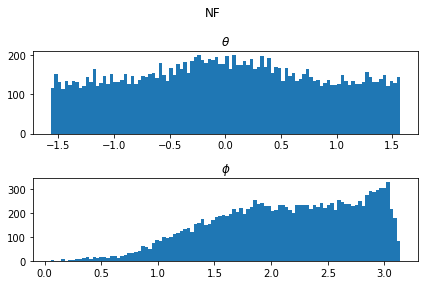

In [154]:
angle_plot(NF_phis, NF_thetas, "NF")

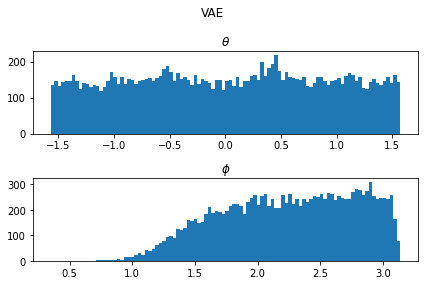

In [155]:
angle_plot(VAE_phis, VAE_thetas, "VAE")

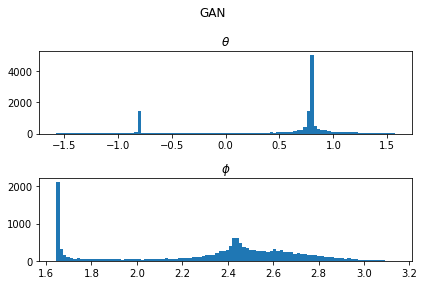

In [156]:
angle_plot(GAN_phis, GAN_thetas, "GAN")

In [207]:
def write_generated_to_csv(data, filename):
    df = pd.DataFrame(data, columns=['E1', 'p_x1', 'p_y1', 'p_z1', 'E2', 'p_x1', 'p_y1', 'p_z1'])
    df.to_csv(filename, index_label="ID")

In [212]:
write_generated_to_csv(NF_generated, "./output/test.csv")